# Exercise 1

Show that the equation
$$ \frac{d}{dt} \frac{\partial L}{\partial \dot{x}} - \frac{\partial L}{\partial x} = 0$$
is just another form of Newton's equation of motion $F= ma$

## Solution

The Lagrangian is given by 
$$L = \frac{1}{2}m\dot{x}^2 - V(x)$$
so plugging directly into the Euler-Lagrange equation we have

$$
\begin{align*}
\frac{d}{dt} \frac{\partial }{\partial \dot{x}}\left(\frac{1}{2}m\dot{x}^2 - V(x)\right) - \frac{\partial }{\partial x}\left(\frac{1}{2}m\dot{x}^2 - V(x)\right) &= 0\\
\frac{d}{dt}\left(m\dot{x}\right) + \frac{\partial V}{\partial x} &= 0\\
\frac{\partial V}{\partial x} &= -m\ddot{x}\\
-F &= -m\ddot{x}\\
F &= ma
\end{align*}
$$

# Exercise 3

Use the Euler-Lagrange equations to derive the equations of motion from the Lagrangian

$$L = \frac{m}{2}(\dot{X}^2+\dot{Y}^2) + \frac{m\omega^2}{2}(X^2 + Y^2) + m\omega(\dot{X}Y - \dot{Y}X)$$

## Solution

Start with partial derivatives of the Lagrangian wrt velocity and position
$$
\begin{align*}
\frac{\partial L}{\partial X} &= m\omega^2 X - m\omega \dot{Y}\\
\frac{\partial L}{\partial Y} &= m\omega^2 Y + m\omega \dot{X}\\
\frac{\partial L}{\partial \dot{X}} &= m \dot{X} + m\omega Y\\
\frac{\partial L}{\partial \dot{Y}} &= m \dot{Y} - m\omega X\\
\end{align*}
$$

Taking the time derivative of the partial derivatives wrt velocity and setting them equal to the partial derivative of the corresponding position coordiate we have
$$
\begin{align*}
m\ddot{X} + m\omega \dot{Y} &= m\omega^2 X - m\omega \dot{Y}\\
m\ddot{Y} - m\omega\dot{X} &= m\omega^2Y + m\omega \dot{X}\\
\end{align*}
$$

Simplifying, this leads to the equations of motion

$$
\begin{align*}
\ddot{X} &= \omega^2 X - 2\omega \dot{Y}\\
\ddot{Y} &= \omega^2Y + 2\omega \dot{X}\\
\end{align*}
$$


We can rewrite this differential equation as

$$\frac{d}{dt}
\begin{bmatrix}
X\\
\dot{X}\\
Y\\
\dot{Y}
\end{bmatrix} = 
\begin{bmatrix}
0 & 1 & 0 & 0\\
\omega^2 & 0 & 0 & -2\omega\\
0 & 0 & 0 & 1\\
2\omega & 0 & \omega^2 & 0\\
\end{bmatrix}
\begin{bmatrix}
X\\
\dot{X}\\
Y\\
\dot{Y}
\end{bmatrix}
$$

This is just a set of linear differential equations $\dot{z}(t) = A z(t)$. The solution is given by the matrix exponential
$$z(t) = \exp(tA)z(0)$$

In [37]:
using PyPlot;
using Colors;

In [46]:
omega = 1

A = [0 1 0 0; omega^2 0 0 -2*omega; 0 0 0 1; 2*omega 0 omega^2 0]
z1_t = [1; 0; 0; 1]
z2_t = [1; -1; 0; 1]
z3_t = [0; 1; 1; 0]


n_timesteps = 100
t_vals = LinRange(0, 5, n_timesteps)
dt = t_vals[2] - t_vals[1]
B = exp(A * dt)

Z1 = zeros(n_timesteps, 2)
Z2 = zeros(n_timesteps, 2)
Z3 = zeros(n_timesteps, 2)

i = 1
for t=t_vals
    z1_t = B * z1_t
    Z1[i, 1] = z1_t[1]
    Z1[i, 2] = z1_t[3]
    
    z2_t = B * z2_t
    Z2[i, 1] = z2_t[1]
    Z2[i, 2] = z2_t[3]
    
    z3_t = B * z3_t
    Z3[i, 1] = z3_t[1]
    Z3[i, 2] = z3_t[3]
    i += 1
end

In [47]:
function plot_smooth_colors(x, y, cmap)
    palette = colormap(cmap, 100)
    for i in range(1,stop=99)
        color = palette[i]
        plot(x[i:i+1], y[i:i+1], color=(red(color), green(color), blue(color)));
    end
end

plot_smooth_colors (generic function with 1 method)

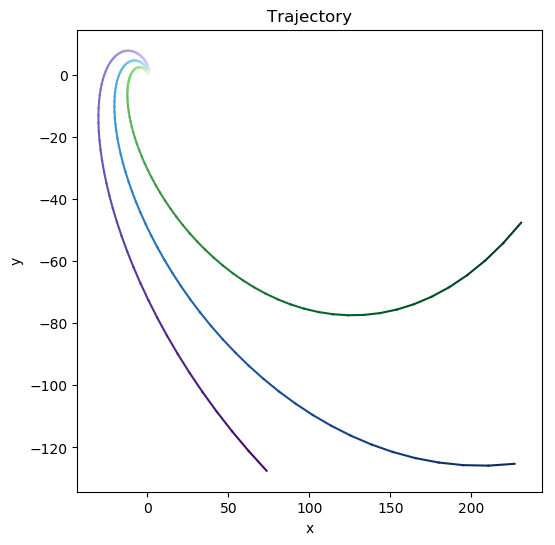

PyObject Text(24.0, 0.5, 'y')

In [48]:
figure(figsize=(6,6))
plot_smooth_colors(Z1[:, 1], Z1[:,2], "Blues")
plot_smooth_colors(Z2[:, 1], Z2[:,2], "Greens")
plot_smooth_colors(Z3[:, 1], Z3[:,2], "Purples")

title("Trajectory")
xlabel("x")
ylabel("y")